In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, PolynomialFeatures, FunctionTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

## The Data

In [2]:
df = pd.read_csv('HospitalData(uncoded).csv')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Operating Certificate Number,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Code,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Costs,Cost INR
0,0,0,0,5957001,18 to 29,F,2,Emergency,Home or Self Care,159,...,Moderate,Minor,Medical,Medicaid,Medicaid,Medicaid,0,Y,9650.35,810629.40
1,1,1,1,7002017,0 to 17,M,3,Newborn,Home or Self Care,218,...,Major,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,3200,N,3039.90,255351.60
2,2,2,2,1401005,50 to 69,M,10,Emergency,Expired,2,...,Extreme,Extreme,Medical,Medicare,Blue Cross/Blue Shield,Medicaid,0,Y,23975.82,2013968.88
3,3,3,3,7002053,50 to 69,F,7,Elective,Home w/ Home Health Services,121,...,Minor,Minor,Medical,Medicare,NaN,NaN,0,Y,23313.55,1958338.20
4,4,4,4,2701001,30 to 49,F,3,Elective,Home or Self Care,189,...,Minor,Minor,Surgical,Blue Cross/Blue Shield,NaN,NaN,0,N,3577.78,300533.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489995,489995,489995,489995,7002020,50 to 69,F,2,Emergency,Home w/ Home Health Services,175,...,Moderate,Minor,Surgical,Medicare,Blue Cross/Blue Shield,Medicare,0,N,18246.36,1532694.24
489996,489996,489996,489996,2950001,50 to 69,F,2,Elective,Home or Self Care,58,...,Moderate,Minor,Surgical,Blue Cross/Blue Shield,NaN,NaN,0,N,8557.49,718829.16
489997,489997,489997,489997,7004003,50 to 69,F,2,Emergency,Home or Self Care,203,...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,0,Y,3255.42,273455.28
489998,489998,489998,489998,7001009,50 to 69,F,8,Emergency,Home w/ Home Health Services,155,...,Minor,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,Y,21645.23,1818199.32


In [3]:
df.shape

(490000, 28)

In [4]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'Operating Certificate Number', 'Age Group', 'Gender', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Costs', 'Cost INR'],
      dtype='object')

## Data Pre-processing

### i. Dropping Unwanted Columns

In [5]:
df.drop(columns=['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0','Operating Certificate Number','CCS Diagnosis Code','CCS Procedure Code',
                 'APR MDC Code','APR DRG Code','APR Severity of Illness Code','Total Costs'], inplace=True)

In [6]:
df

,Age Group,Gender,Length of Stay,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Cost INR
0,18 to 29,F,2,Emergency,Home or Self Care,Urinary tract infections,NO PROC,Kidney & urinary tract infections,Diseases and Disorders of the Kidney and Urina...,Moderate,Minor,Medical,Medicaid,Medicaid,Medicaid,0,Y,810629.40
1,0 to 17,M,3,Newborn,Home or Self Care,Liveborn,RESP INTUB/MECH VENTIL,"Neonate birthwt >2499g, normal newborn or neon...",Newborns and Other Neonates with Conditions Or...,Major,Minor,Medical,Blue Cross/Blue Shield,NaN,NaN,3200,N,255351.60
2,50 to 69,M,10,Emergency,Expired,Septicemia (except in labor),RESP INTUB/MECH VENTIL,Septicemia & disseminated infections,"Infectious and Parasitic Diseases, Systemic or...",Extreme,Extreme,Medical,Medicare,Blue Cross/Blue Shield,Medicaid,0,Y,2013968.88
3,50 to 69,F,7,Elective,Home w/ Home Health Services,Other diseases of veins and lymphatics,OT OR THER PRC SKN/BRST,Peripheral & other vascular disorders,Diseases and Disorders of the Circulatory System,Minor,Minor,Medical,Medicare,NaN,NaN,0,Y,1958338.20
4,30 to 49,F,3,Elective,Home or Self Care,Previous C-section,CESAREAN SECTION,Cesarean delivery,"Pregnancy, Childbirth and the Puerperium",Minor,Minor,Surgical,Blue Cross/Blue Shield,NaN,NaN,0,N,300533.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489995,50 to 69,F,2,Emergency,Home w/ Home Health Services,Other female genital disorders,OT EXC CERVIX & UTERUS,Uterine & adnexa procedures for non-malignancy...,Diseases and Disorders of the Female Reproduct...,Moderate,Minor,Surgical,Medicare,Blue Cross/Blue Shield,Medicare,0,N,1532694.24
489996,50 to 69,F,2,Elective,Home or Self Care,Other nutritional; endocrine; and metabolic di...,GASTRECTOMY; PART/TOTAL,Procedures for obesity,"Endocrine, Nutritional and Metabolic Diseases ...",Moderate,Minor,Surgical,Blue Cross/Blue Shield,NaN,NaN,0,N,718829.16
489997,50 to 69,F,2,Emergency,Home or Self Care,Osteoarthritis,NO PROC,Other musculoskeletal system & connective tiss...,Diseases and Disorders of the Musculoskeletal ...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,0,Y,273455.28
489998,50 to 69,F,8,Emergency,Home w/ Home Health Services,Other gastrointestinal disorders,OTHER BOWEL DX PRCS,Other digestive system diagnoses,Diseases and Disorders of the Digestive System,Minor,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,Y,1818199.32


In [7]:
df.describe()

,Length of Stay,Birth Weight,Cost INR
count,490000.000000,490000.000000,4.900000e+05
mean,5.407029,318.655510,1.318255e+06
std,7.957983,978.497916,2.594791e+06
min,1.000000,0.000000,8.400000e-01
25%,2.000000,0.000000,3.891117e+05
50%,3.000000,0.000000,7.281217e+05
75%,6.000000,0.000000,1.404628e+06
max,120.000000,8600.000000,2.596790e+08


### ii. Check for Null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490000 entries, 0 to 489999
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Age Group                            490000 non-null  object 
 1   Gender                               490000 non-null  object 
 2   Length of Stay                       490000 non-null  int64  
 3   Type of Admission                    490000 non-null  object 
 4   Patient Disposition                  490000 non-null  object 
 5   CCS Diagnosis Description            490000 non-null  object 
 6   CCS Procedure Description            490000 non-null  object 
 7   APR DRG Description                  490000 non-null  object 
 8   APR MDC Description                  490000 non-null  object 
 9   APR Severity of Illness Description  490000 non-null  object 
 10  APR Risk of Mortality                490000 non-null  object 
 11  APR Medical S

In [9]:
df['Payment Typology 2'].fillna(value="Unknown",inplace=True)
df['Payment Typology 3'].fillna(value="Unknown",inplace=True)

### iii. Handling Categorical Variables

In [10]:
for col in df.columns:
    print(df[col].value_counts())
    print("="*10)

Age Group
50 to 69    273157
30 to 49     94416
0 to 17      72399
18 to 29     50028
Name: count, dtype: int64
Gender
F    271523
M    218475
U         2
Name: count, dtype: int64
Length of Stay
2      114258
3       88615
1       72242
4       51603
5       33616
        ...  
100         9
106         7
113         7
115         7
119         6
Name: count, Length: 120, dtype: int64
Type of Admission
Emergency        313498
Elective          92309
Newborn           46944
Urgent            35789
Trauma             1373
Not Available        87
Name: count, dtype: int64
Patient Disposition
Home or Self Care                        325756
Home w/ Home Health Services              66782
Skilled Nursing Home                      46581
Expired                                   10433
Left Against Medical Advice                9873
Inpatient Rehabilitation Facility          9288
Short-term Hospital                        8367
Hospice - Medical Facility                 2664
Psychiatric Hospita

In [11]:
trf_encoding = ColumnTransformer([
    ("enc1",OrdinalEncoder(categories=[[category for category in df['Age Group'].unique()]]),["Age Group"]),
    ("enc2",OrdinalEncoder(categories=[[category for category in df['Gender'].unique()]]),["Gender"]),
    ("enc3",OrdinalEncoder(categories=[[category for category in df['Type of Admission'].unique()]]),['Type of Admission']),
    ("enc4",OrdinalEncoder(categories=[[category for category in df['Patient Disposition'].unique()]]),['Patient Disposition']),
    ("enc5",OrdinalEncoder(categories=[[category for category in df['CCS Diagnosis Description'].unique()]]),['CCS Diagnosis Description']),
    ("enc6",OrdinalEncoder(categories=[[category for category in df['CCS Procedure Description'].unique()]]),['CCS Procedure Description']),
    ("enc7",OrdinalEncoder(categories=[[category for category in df['APR DRG Description'].unique()]]),['APR DRG Description']),
    ("enc8",OrdinalEncoder(categories=[[category for category in df['APR MDC Description'].unique()]]),['APR MDC Description']),
    ("enc9",OrdinalEncoder(categories=[[category for category in df['APR Severity of Illness Description'].unique()]]),['APR Severity of Illness Description']),
    ("enc10",OrdinalEncoder(categories=[[category for category in df['APR Risk of Mortality'].unique()]]),['APR Risk of Mortality']),
    ("enc11",OrdinalEncoder(categories=[[category for category in df['APR Medical Surgical Description'].unique()]]),['APR Medical Surgical Description']),
    ("enc12",OrdinalEncoder(categories=[[category for category in df['Payment Typology 1'].unique()]]),['Payment Typology 1']),
    ("enc13",OrdinalEncoder(categories=[[category for category in df['Payment Typology 2'].unique()]]),['Payment Typology 2']),
    ("enc14",OrdinalEncoder(categories=[[category for category in df['Payment Typology 3'].unique()]]),['Payment Typology 3']),
    ("enc15",OrdinalEncoder(categories=[[category for category in df['Emergency Department Indicator'].unique()]]),['Emergency Department Indicator'])    
], remainder="passthrough")

In [12]:
#for i in df['Type of Admission'].unique():
#    print(i)

In [13]:
new_df = pd.DataFrame(trf_encoding.fit_transform(df),columns=['Age Group','Gender','Type of Admission','Patient Disposition',
                                                              'CCS Diagnosis Description','CCS Procedure Description','APR DRG Description',
                                                             'APR MDC Description','APR Severity of Illness Description','APR Risk of Mortality',
                                                             'APR Medical Surgical Description','Payment Typology 1','Payment Typology 2',
                                                             'Payment Typology 3','Emergency Department Indicator','Length of Stay','Birth Weight','Cost INR'])

In [14]:
new_df

,Age Group,Gender,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Emergency Department Indicator,Length of Stay,Birth Weight,Cost INR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,810629.40
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,3200.0,255351.60
2,2.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,10.0,0.0,2013968.88
3,2.0,0.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,0.0,0.0,2.0,1.0,1.0,0.0,7.0,0.0,1958338.20
4,3.0,0.0,2.0,0.0,4.0,3.0,4.0,4.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,300533.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489995,2.0,0.0,0.0,2.0,129.0,128.0,26.0,15.0,0.0,0.0,1.0,2.0,2.0,3.0,1.0,2.0,0.0,1532694.24
489996,2.0,0.0,2.0,0.0,67.0,53.0,90.0,16.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,718829.16
489997,2.0,0.0,0.0,0.0,19.0,0.0,41.0,7.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,273455.28
489998,2.0,0.0,0.0,2.0,93.0,11.0,5.0,5.0,3.0,2.0,0.0,2.0,3.0,5.0,0.0,8.0,0.0,1818199.32


In [15]:
#to check the correctness
for col in new_df.columns:
    print(new_df[col].value_counts())

Age Group
2.0    273157
3.0     94416
1.0     72399
0.0     50028
Name: count, dtype: int64
Gender
0.0    271523
1.0    218475
2.0         2
Name: count, dtype: int64
Type of Admission
0.0    313498
2.0     92309
1.0     46944
3.0     35789
4.0      1373
5.0        87
Name: count, dtype: int64
Patient Disposition
0.0     325756
2.0      66782
4.0      46581
1.0      10433
5.0       9873
3.0       9288
7.0       8367
15.0      2664
9.0       2494
11.0      2488
12.0      1422
6.0       1363
14.0       883
13.0       501
8.0        420
17.0       298
10.0       190
16.0       173
18.0        24
Name: count, dtype: int64
CCS Diagnosis Description
1.0      46927
2.0      23012
19.0     14271
12.0     11108
10.0     10585
         ...  
257.0        5
226.0        4
256.0        2
252.0        2
258.0        2
Name: count, Length: 259, dtype: int64
CCS Procedure Description
0.0      146002
4.0       32275
16.0      23129
3.0       15149
1.0       15129
          ...  
221.0         3
216.0 

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490000 entries, 0 to 489999
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Age Group                            490000 non-null  float64
 1   Gender                               490000 non-null  float64
 2   Type of Admission                    490000 non-null  float64
 3   Patient Disposition                  490000 non-null  float64
 4   CCS Diagnosis Description            490000 non-null  float64
 5   CCS Procedure Description            490000 non-null  float64
 6   APR DRG Description                  490000 non-null  float64
 7   APR MDC Description                  490000 non-null  float64
 8   APR Severity of Illness Description  490000 non-null  float64
 9   APR Risk of Mortality                490000 non-null  float64
 10  APR Medical Surgical Description     490000 non-null  float64
 11  Payment Typol

## Exploratory Data Analysis 

### i. Check for Multi-Collinearity

In [17]:
new_df.corr()

,Age Group,Gender,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Emergency Department Indicator,Length of Stay,Birth Weight,Cost INR
Age Group,1.000000,0.021778,-0.056960,0.095267,0.100467,0.065591,0.116935,0.115859,-0.127956,0.161574,0.115487,0.091170,0.057041,-0.022474,-0.146691,0.041294,-0.321894,0.054990
Gender,0.021778,1.000000,-0.098552,0.040328,0.003048,0.041046,0.100533,0.037423,-0.026205,0.074144,-0.032819,0.022649,0.015316,-0.002760,-0.067500,0.050682,0.049153,0.043883
Type of Admission,-0.056960,-0.098552,1.000000,-0.109686,-0.017678,0.119812,-0.041936,-0.083745,0.119598,-0.234330,0.326147,0.025762,0.028806,0.023549,0.740911,-0.041794,0.094956,0.033561
Patient Disposition,0.095267,0.040328,-0.109686,1.000000,0.006041,0.008528,0.064282,0.034355,-0.094612,0.273193,-0.011595,0.044858,0.042818,0.023065,-0.155771,0.176469,-0.153035,0.137853
CCS Diagnosis Description,0.100467,0.003048,-0.017678,0.006041,1.000000,0.194234,0.512836,0.304733,-0.088853,0.081490,0.094136,0.029322,0.021712,0.004755,-0.111467,0.000732,-0.321525,0.038876
CCS Procedure Description,0.065591,0.041046,0.119812,0.008528,0.194234,1.000000,0.280245,0.032106,-0.016452,0.061294,0.380381,0.042589,0.035070,0.023467,0.075782,0.086661,-0.134107,0.172853
APR DRG Description,0.116935,0.100533,-0.041936,0.064282,0.512836,0.280245,1.000000,0.339115,-0.110315,0.121346,0.187908,0.029619,0.027066,0.008663,-0.098855,0.123458,-0.272697,0.153752
APR MDC Description,0.115859,0.037423,-0.083745,0.034355,0.304733,0.032106,0.339115,1.000000,-0.112151,0.039429,0.023248,0.005260,-0.011524,-0.011064,-0.164961,0.031984,-0.353480,0.009821
APR Severity of Illness Description,-0.127956,-0.026205,0.119598,-0.094612,-0.088853,-0.016452,-0.110315,-0.112151,1.000000,-0.286371,0.049280,-0.001235,-0.028494,-0.013826,0.190911,-0.064010,0.264710,-0.019527
APR Risk of Mortality,0.161574,0.074144,-0.234330,0.273193,0.081490,0.061294,0.121346,0.039429,-0.286371,1.000000,-0.063816,0.066834,0.101403,0.058299,-0.306109,0.171386,-0.241779,0.151654


<Axes: >

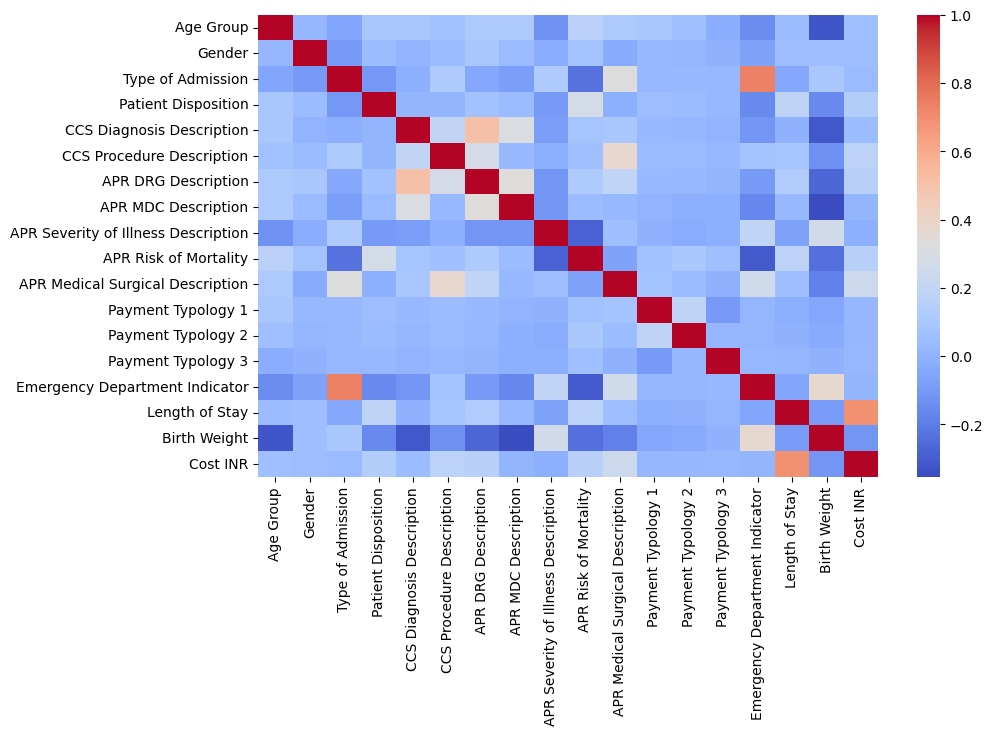

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(new_df.corr(), cmap='coolwarm')

In [ ]:
#Length of Stay looks like highly correlated to Cost INR.
#whereas ARP MDC Description, Payment Typology 2 and Payment Typology 3 look like the least correlated with Cost INR

### ii. Data Distribution with respect to Target column

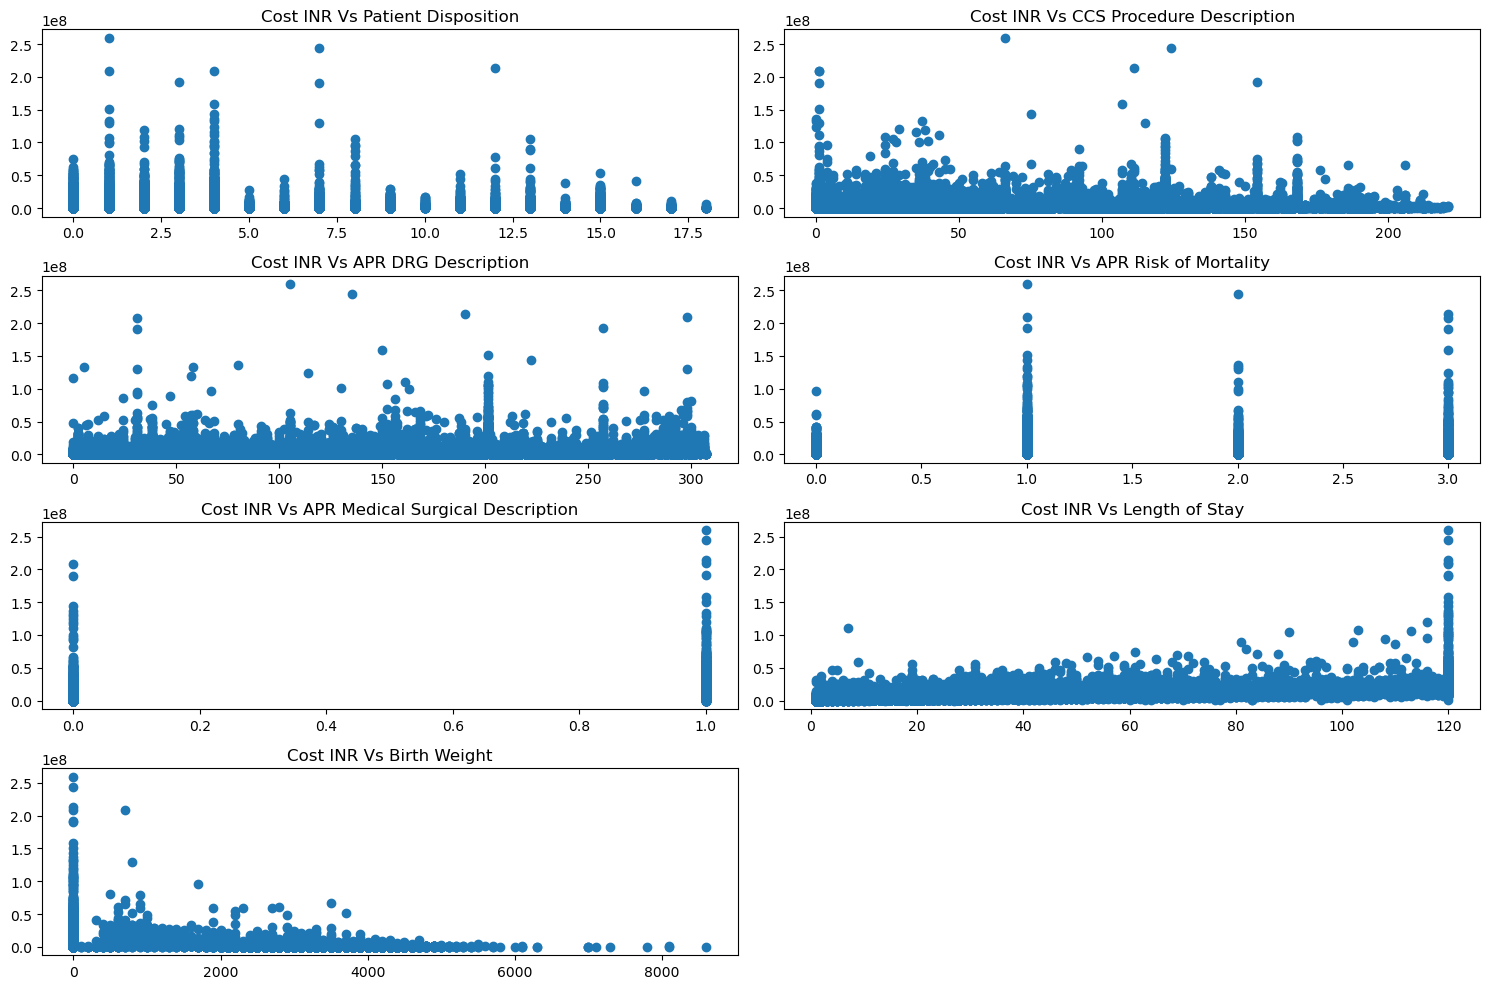

In [19]:
threshlod_corr_cols = new_df.corr().iloc[-1][(new_df.corr().iloc[-1] > 0.09) | (new_df.corr().iloc[-1] < -0.1) ].index[:-1]
plt.figure(figsize=(15,10))
ax=1
for col in threshlod_corr_cols:
    plt.subplot(4,2,ax)
    plt.scatter(x=new_df[col],y=new_df['Cost INR'])
    ax+=1
    plt.title(f"Cost INR Vs {col}")
    
plt.tight_layout()
plt.show()

In [20]:
new_df.describe()

,Age Group,Gender,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Emergency Department Indicator,Length of Stay,Birth Weight,Cost INR
count,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,4.900000e+05
mean,1.840737,0.445876,0.703788,1.252114,56.019631,27.070894,74.069378,6.899204,1.345771,0.921288,0.254453,1.755810,1.947308,1.617792,0.415124,5.407029,318.655510,1.318255e+06
std,0.850569,0.497071,1.029880,2.387530,52.816778,38.648528,68.104814,5.346441,1.282028,1.175662,0.435554,1.645519,1.807091,1.312877,0.492744,7.957983,978.497916,2.594791e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.400000e-01
25%,2.000000,0.000000,0.000000,0.000000,12.000000,0.000000,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.891117e+05
50%,2.000000,0.000000,0.000000,0.000000,44.000000,11.000000,53.000000,5.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,3.000000,0.000000,7.281217e+05
75%,2.000000,1.000000,2.000000,2.000000,86.000000,38.000000,117.000000,10.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,6.000000,0.000000,1.404628e+06
max,3.000000,2.000000,5.000000,18.000000,258.000000,221.000000,307.000000,23.000000,3.000000,3.000000,1.000000,9.000000,9.000000,9.000000,1.000000,120.000000,8600.000000,2.596790e+08


### iii. Distribution Plot for Features + Handling Outliers

In [21]:
for col in new_df.columns:
    if new_df[col].nunique() > 10:
        print(col)

Patient Disposition
CCS Diagnosis Description
CCS Procedure Description
APR DRG Description
APR MDC Description
Length of Stay
Birth Weight
Cost INR


In [22]:
plot_dist_cols = [col for col in new_df.columns if new_df[col].nunique()>10]

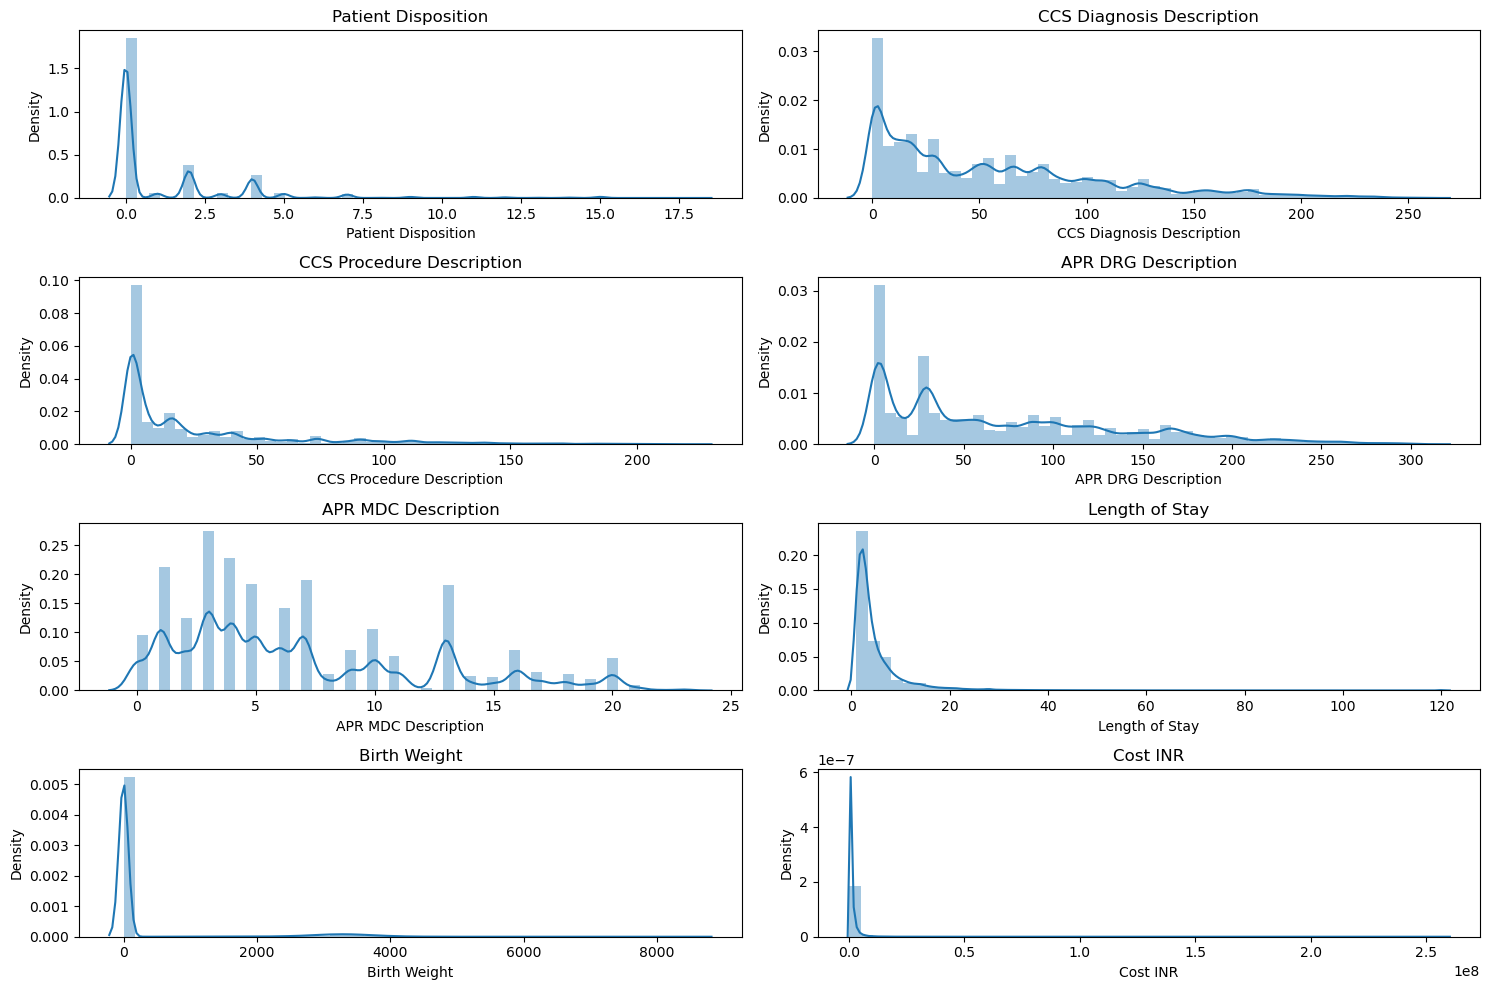

In [23]:
plt.figure(figsize=(15,10))
ax=1
for col in plot_dist_cols:
    plt.subplot(4,2,ax)
    sns.distplot(new_df[col])
    ax+=1
    plt.title(f"{col}")
    
plt.tight_layout()
plt.show()

**>>>Applying Log Transformation to the Features which are heavily right skewed**

In [24]:
trf = FunctionTransformer(func=np.log1p)

In [25]:
log_trf_cols = new_df[plot_dist_cols].iloc[:,:-1]

In [26]:
dist_log_trf_cols = trf.fit_transform(log_trf_cols)

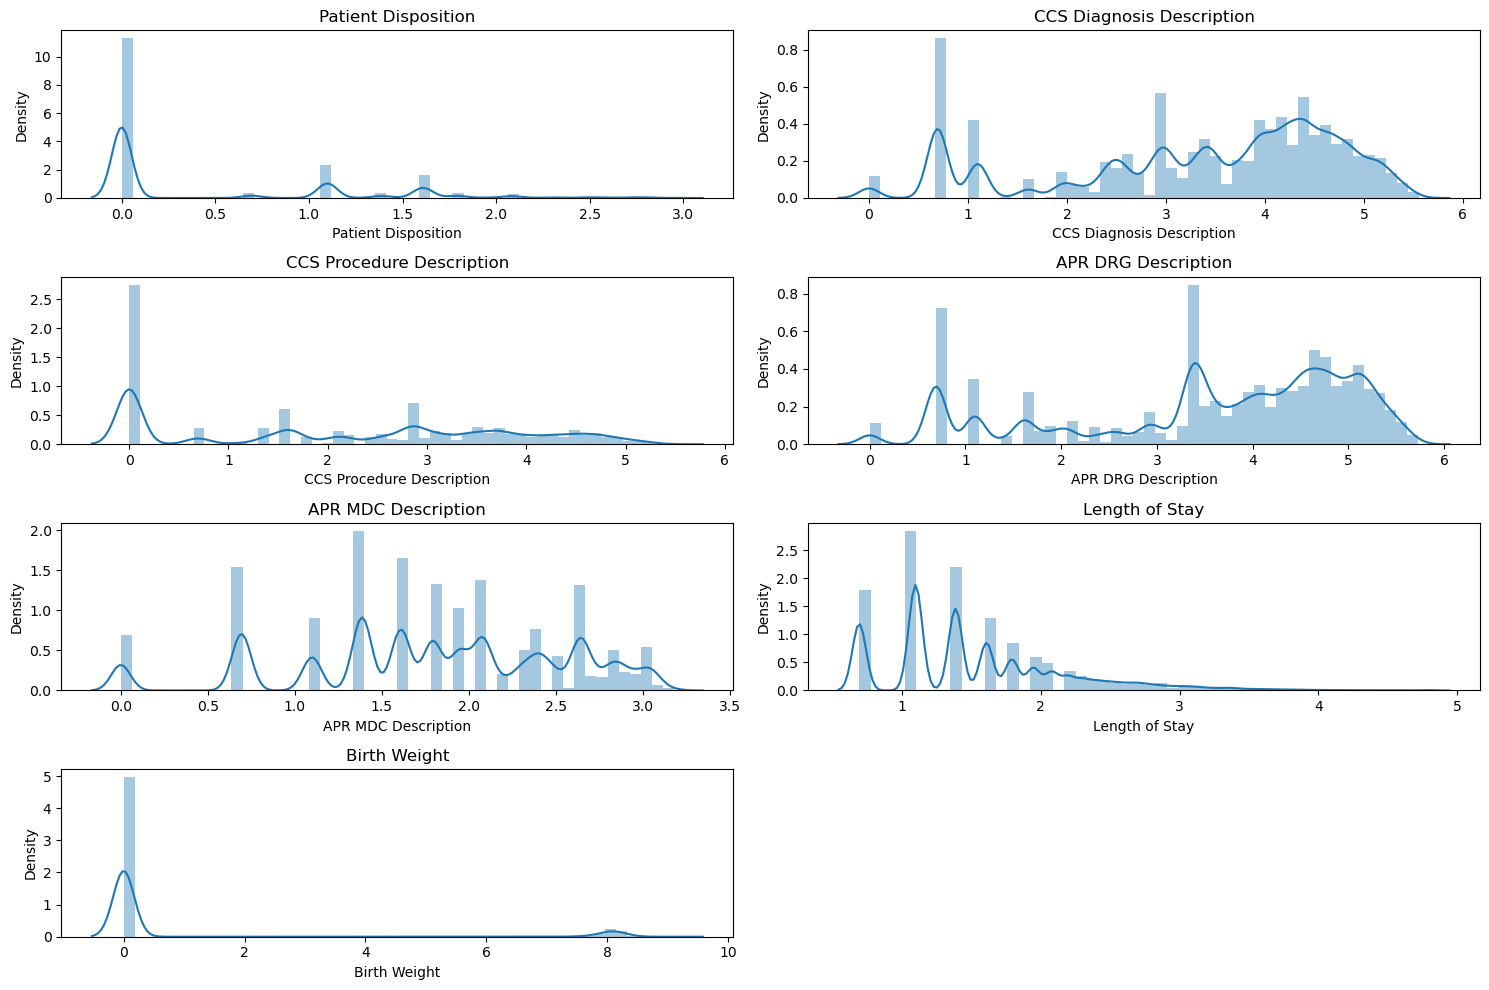

In [27]:
plt.figure(figsize=(15,10))
ax=1
for col in dist_log_trf_cols.columns:
    plt.subplot(4,2,ax)
    sns.distplot(dist_log_trf_cols[col])
    ax+=1
    plt.title(f"{col}")
    
plt.tight_layout()
plt.show()

In [28]:
new_df[plot_dist_cols]

,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,Length of Stay,Birth Weight,Cost INR
0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,810629.40
1,0.0,1.0,1.0,1.0,1.0,3.0,3200.0,255351.60
2,1.0,2.0,1.0,2.0,2.0,10.0,0.0,2013968.88
3,2.0,3.0,2.0,3.0,3.0,7.0,0.0,1958338.20
4,0.0,4.0,3.0,4.0,4.0,3.0,0.0,300533.52
...,...,...,...,...,...,...,...,...
489995,2.0,129.0,128.0,26.0,15.0,2.0,0.0,1532694.24
489996,0.0,67.0,53.0,90.0,16.0,2.0,0.0,718829.16
489997,0.0,19.0,0.0,41.0,7.0,2.0,0.0,273455.28
489998,2.0,93.0,11.0,5.0,5.0,8.0,0.0,1818199.32


In [29]:
df1 = new_df.copy()

In [30]:
new_df[plot_dist_cols[:-1]] = dist_log_trf_cols

In [31]:
new_df[plot_dist_cols]

,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,Length of Stay,Birth Weight,Cost INR
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,810629.40
1,0.000000,0.693147,0.693147,0.693147,0.693147,1.386294,8.071219,255351.60
2,0.693147,1.098612,0.693147,1.098612,1.098612,2.397895,0.000000,2013968.88
3,1.098612,1.386294,1.098612,1.386294,1.386294,2.079442,0.000000,1958338.20
4,0.000000,1.609438,1.386294,1.609438,1.609438,1.386294,0.000000,300533.52
...,...,...,...,...,...,...,...,...
489995,1.098612,4.867534,4.859812,3.295837,2.772589,1.098612,0.000000,1532694.24
489996,0.000000,4.219508,3.988984,4.510860,2.833213,1.098612,0.000000,718829.16
489997,0.000000,2.995732,0.000000,3.737670,2.079442,1.098612,0.000000,273455.28
489998,1.098612,4.543295,2.484907,1.791759,1.791759,2.197225,0.000000,1818199.32


In [32]:
dist_log_trf_cols

,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,Length of Stay,Birth Weight
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000
1,0.000000,0.693147,0.693147,0.693147,0.693147,1.386294,8.071219
2,0.693147,1.098612,0.693147,1.098612,1.098612,2.397895,0.000000
3,1.098612,1.386294,1.098612,1.386294,1.386294,2.079442,0.000000
4,0.000000,1.609438,1.386294,1.609438,1.609438,1.386294,0.000000
...,...,...,...,...,...,...,...
489995,1.098612,4.867534,4.859812,3.295837,2.772589,1.098612,0.000000
489996,0.000000,4.219508,3.988984,4.510860,2.833213,1.098612,0.000000
489997,0.000000,2.995732,0.000000,3.737670,2.079442,1.098612,0.000000
489998,1.098612,4.543295,2.484907,1.791759,1.791759,2.197225,0.000000


In [33]:
new_df.head(10)

,Age Group,Gender,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Emergency Department Indicator,Length of Stay,Birth Weight,Cost INR
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.000000,810629.40
1,1.0,1.0,1.0,0.000000,0.693147,0.693147,0.693147,0.693147,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.386294,8.071219,255351.60
2,2.0,1.0,0.0,0.693147,1.098612,0.693147,1.098612,1.098612,2.0,1.0,0.0,2.0,2.0,0.0,0.0,2.397895,0.000000,2013968.88
3,2.0,0.0,2.0,1.098612,1.386294,1.098612,1.386294,1.386294,3.0,0.0,0.0,2.0,1.0,1.0,0.0,2.079442,0.000000,1958338.20
4,3.0,0.0,2.0,0.000000,1.609438,1.386294,1.609438,1.609438,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.386294,0.000000,300533.52
5,3.0,0.0,2.0,0.000000,1.609438,1.386294,1.609438,1.609438,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.386294,0.000000,689106.60
6,2.0,0.0,0.0,0.000000,1.791759,1.609438,1.791759,1.791759,0.0,0.0,0.0,2.0,3.0,1.0,0.0,1.386294,0.000000,377646.36
7,2.0,0.0,0.0,1.386294,1.945910,0.000000,1.945910,1.945910,0.0,2.0,0.0,2.0,3.0,2.0,0.0,1.791759,0.000000,754771.08
8,2.0,0.0,0.0,1.609438,2.079442,1.791759,2.079442,2.079442,3.0,2.0,1.0,2.0,3.0,1.0,0.0,1.609438,0.000000,1201902.24
9,2.0,1.0,0.0,1.386294,2.197225,1.945910,2.197225,1.945910,1.0,2.0,1.0,2.0,4.0,3.0,0.0,2.397895,0.000000,5465933.76


## Train-Test Split

In [34]:
X = new_df.drop(columns=['Cost INR'])
y = new_df[['Cost INR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((343000, 17), (147000, 17), (343000, 1), (147000, 1))

In [35]:
X_train.head(2)

,Age Group,Gender,Type of Admission,Patient Disposition,CCS Diagnosis Description,CCS Procedure Description,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Emergency Department Indicator,Length of Stay,Birth Weight
368447,2.0,0.0,0.0,1.609438,3.433987,4.060443,3.433987,1.386294,1.0,3.0,0.0,4.0,5.0,1.0,0.0,3.044522,0.0
450920,1.0,0.0,3.0,0.000000,2.564949,3.091042,3.637586,2.397895,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.197225,0.0


In [36]:
y.head(2)

,Cost INR
0,810629.4
1,255351.6


## Model Building

### 1. Linear Regression

In [37]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred_lm = linear_model.predict(X_test)

r2_score(y_test, y_pred_lm)

0.35583905128591997

In [39]:
r2_score(y_train, linear_model.predict(X_train))

0.32513307312362494

In [40]:
mean_absolute_error(y_test, y_pred_lm), mean_absolute_error(y_train, linear_model.predict(X_train))

(860489.730887504, 865516.217552109)

### 2. Decision Tree Regressor

In [41]:
dt_model = DecisionTreeRegressor(max_depth=6, random_state=0,criterion='poisson', splitter='best')
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, random_state=0)

In [42]:
y_pred_dt = dt_model.predict(X_test)

r2_score(y_test, y_pred_dt)

0.5946271652383837

In [43]:
r2_score(y_train, dt_model.predict(X_train))

0.6315933253018622

In [44]:
mean_absolute_error(y_test, y_pred_dt), mean_absolute_error(y_train, dt_model.predict(X_train))

(542521.0211276697, 538664.5971011927)

**>>> Check for Over-fitting**

In [88]:
cv_scores_dt = cross_validate(dt_model, X_train, y_train, cv=10, scoring="r2",return_train_score=True)

In [89]:
print("Test>>>","Min:",cv_scores_dt.get("test_score").min(), "Max:",cv_scores_dt.get("test_score").max())
print("="*60)
print("Train>>>","Min:",cv_scores_dt.get("train_score").min(), "Max:",cv_scores_dt.get("train_score").max())

Test>>> Min: 0.5564804837654891 Max: 0.6467902271509954
Train>>> Min: 0.6311055926143198 Max: 0.6444140179377129


### 3. XG Boost Regressor

In [45]:
xgb_model = XGBRegressor(n_estimators=30,booster="dart",max_depth=2, random_state=7996)

In [46]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=7996, ...)

In [47]:
y_pred_xgb = xgb_model.predict(X_test)

r2_score(y_test, y_pred_xgb)

0.6361677915119279

In [48]:
r2_score(y_train, xgb_model.predict(X_train))

0.6337669740148313

**>>> Check for Over-fitting**

In [49]:
cv_scores = cross_validate(xgb_model, X_train, y_train, cv=10, scoring="r2",return_train_score=True, return_estimator=False)

In [50]:
print("Test>>>","Min:",cv_scores.get("test_score").min(), "Max:",cv_scores.get("test_score").max())
print("="*60)
print("Train>>>","Min:",cv_scores.get("train_score").min(), "Max:",cv_scores.get("train_score").max())

Test>>> Min: 0.561031847300731 Max: 0.6531174826462336
Train>>> Min: 0.6320958646113854 Max: 0.6439145419654536


In [51]:
mean_absolute_error(y_test, y_pred_xgb), mean_absolute_error(y_train, xgb_model.predict(X_train))

(547923.4546830273, 547556.597798207)

In [52]:
#XGB Still overfits

### 4. Polynomial Regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly = PolynomialFeatures(degree=2)

In [55]:
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.transform(X_test)

In [56]:
poly_model = LinearRegression()

poly_model.fit(poly_features_train,y_train)

LinearRegression()

In [57]:
poly_model.score(poly_features_train,y_train)

0.5305051212304872

In [58]:
poly_model.score(poly_features_test,y_test)

0.5557864357370548

In [59]:
cross_validate(poly_model, poly_features_train, y_train, cv=10, scoring='r2')

{'fit_time': array([5.30494332, 4.09614992, 3.79648161, 3.63206744, 3.7753377 ,
        4.00184321, 4.01042938, 3.81990695, 3.62051725, 3.58760166]),
 'score_time': array([0.01899886, 0.02292013, 0.01799417, 0.02099395, 0.02000856,
        0.02441454, 0.0275526 , 0.01599956, 0.01953292, 0.01800013]),
 'test_score': array([ 5.02105649e-01, -3.78322764e+12,  5.66419202e-01,  5.13708731e-01,
         5.29109495e-01,  5.83270629e-01,  4.81614619e-01,  5.23983248e-01,
         5.60441558e-01,  5.12719140e-01])}

In [60]:
#polynomial with degree 3--> train=62 test=-5....


### 5. Random Forest Regressor

In [61]:
rf_model = RandomForestRegressor(n_estimators=100,max_depth=6, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=42)

In [62]:
y_pred_rf=rf_model.predict(X_test)
r2_score(y_test,y_pred_rf)

0.6327492122615432

In [63]:
y_pred_train_rf = rf_model.predict(X_train)
r2_score(y_train,y_pred_train_rf)

0.7070830898237115

**>>> Check for Over-fitting**

In [64]:
cv_scores_rf = cross_validate(rf_model, X_train, y_train, cv=10, scoring="r2",return_train_score=True)

In [65]:
print("Test>>>","Min:",cv_scores_rf.get("test_score").min(), "Max:",cv_scores_rf.get("test_score").max())
print("="*60)
print("Train>>>","Min:",cv_scores_rf.get("train_score").min(), "Max:",cv_scores_rf.get("train_score").max())

Test>>> Min: 0.5985728313692291 Max: 0.6843897369638008
Train>>> Min: 0.7102635832993396 Max: 0.7148813780915088


In [87]:
#Better than XGBoost

## PCA

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA()
transformed = pca.fit_transform(X_train)

In [68]:
transformed_test = pca.transform(X_test)

In [69]:
transformed_df = pd.DataFrame(transformed,columns=[f"PC{(i+1)}" for i in range(17)])
transformed_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.419099,4.058067,0.528009,0.157739,2.105006,-0.596657,-0.811970,-1.415214,0.223315,0.411059,0.122282,0.868647,0.141971,0.594047,-0.545189,0.400748,0.016261
1,-0.162208,-2.548751,1.579826,-1.128946,0.983410,0.561386,1.908735,2.521291,0.709088,0.205050,1.293207,-0.193238,-0.669152,0.398411,-0.313721,0.610275,0.106632
2,-1.177691,-0.095880,-1.696215,2.746170,-2.366555,0.744242,0.479414,-0.904679,-0.464601,-0.901265,-0.790005,-0.409541,0.489903,-0.021654,-0.459265,0.135842,0.097108
3,-0.591050,-2.345900,2.049546,-0.246866,0.171665,-1.233860,-0.170709,0.823738,0.741914,-0.763991,1.182514,0.739436,0.148212,-0.041519,0.593701,-0.378348,-0.081547
4,8.829497,-0.634876,-0.486040,0.206615,-0.729956,0.258401,-0.674294,-0.340403,0.474318,-0.019855,-0.164895,0.301442,-0.131021,0.319002,-0.477731,-0.102891,-0.002171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342995,-1.177448,-1.130312,-2.037772,0.842911,-0.887400,0.562757,-0.905331,1.129135,-0.918840,-0.136071,-0.249587,-0.316330,0.779868,0.302699,0.577826,0.001922,0.088696
342996,-0.797567,-2.078067,-2.034266,-0.749364,-0.796697,-0.183108,-0.925175,1.084585,-0.772446,-0.800029,-1.355358,-0.523262,1.992783,0.490827,0.671807,0.007959,0.060241
342997,-0.551768,-1.705501,1.125346,-0.844556,0.050496,-1.041785,-0.573884,1.706341,-0.035813,0.197521,1.444334,-0.466989,-0.487104,0.198618,-0.419683,0.608550,0.715022
342998,-0.268706,1.296245,-0.505114,-0.390664,2.320582,-1.563588,-0.238841,-1.134979,0.297672,0.580906,-0.576224,0.538400,-0.197824,-0.723217,0.578850,0.203802,0.014699


In [70]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

In [71]:
summary = pd.DataFrame(index=transformed_df.columns)
summary['standard_deviation'] = np.sqrt(pca.explained_variance_)
summary['explained_variance_ratio'] = explained_variance
summary['cum_explained_variance_ratio'] = cumulative_explained_variance

In [72]:
summary

,standard_deviation,explained_variance_ratio,cum_explained_variance_ratio
PC1,2.872394,0.298355,0.298355
PC2,1.901686,0.130774,0.429129
PC3,1.797291,0.116811,0.545940
PC4,1.560651,0.088076,0.634016
PC5,1.385443,0.069410,0.703426
PC6,1.284521,0.059666,0.763092
PC7,1.280349,0.059279,0.822371
PC8,1.100243,0.043775,0.866146
PC9,0.944165,0.032236,0.898382
PC10,0.796666,0.022951,0.921333


### i. Linear Regression

In [73]:
linear_model.fit(transformed_df,y_train)

LinearRegression()

In [74]:
print("test_score:",linear_model.score(transformed_test,y_test), "train_score:",linear_model.score(transformed,y_train))

test_score: 0.35583905128591997 train_score: 0.3251330731236248


### ii. Decision Tree

In [75]:
dt_model.fit(transformed_df,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, random_state=0)

In [76]:
print("test_score:",dt_model.score(transformed_test,y_test), "train_score:",dt_model.score(transformed,y_train))

test_score: 0.43192733069899336 train_score: 0.4780742518391071


### iii. XG Boost 

In [77]:
xgb_model.fit(transformed_df,y_train)

XGBRegressor(base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=7996, ...)

In [78]:
print("test_score:",xgb_model.score(transformed_test,y_test), "train_score:", xgb_model.score(transformed,y_train))

test_score: 0.489051394795156 train_score: 0.48027735942202


## Comparing Different Transformations

In [79]:
trf2 = FunctionTransformer(func=np.square)

log_trf_cols = new_df[plot_dist_cols].iloc[:,:-1]

dist_sq_trf_cols = trf2.fit_transform(log_trf_cols)

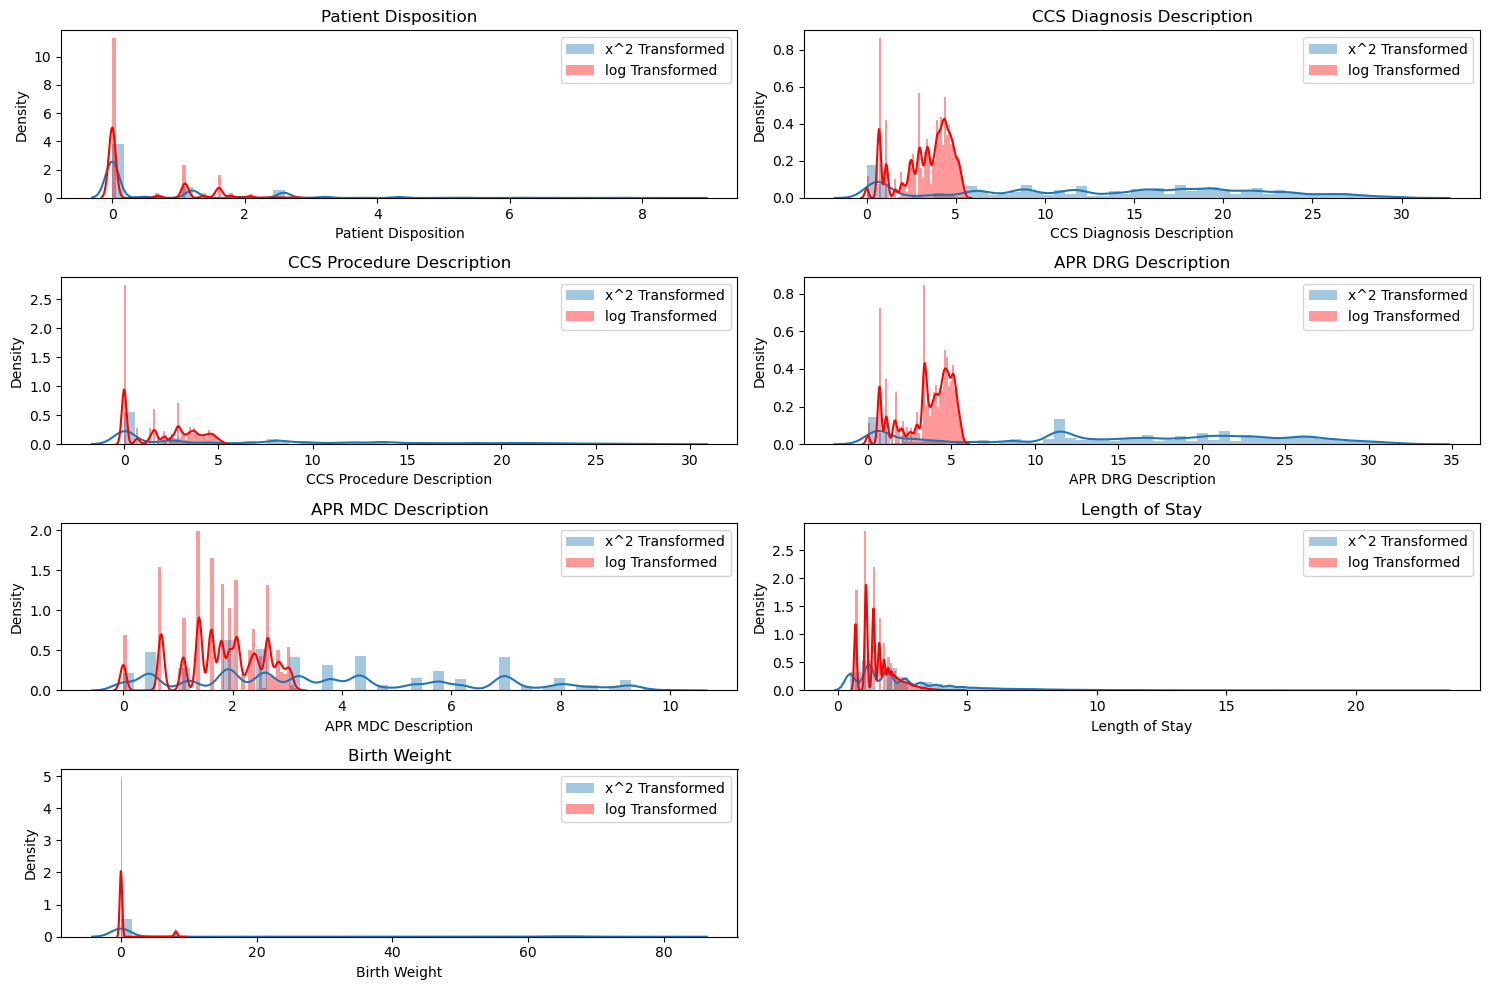

In [80]:
plt.figure(figsize=(15,10))
ax=1
for col in dist_sq_trf_cols.columns:
    plt.subplot(4,2,ax)
    sns.distplot(dist_sq_trf_cols[col], label="x^2 Transformed")
    sns.distplot(dist_log_trf_cols[col], color='red', label="log Transformed")
    ax+=1
    plt.title(f"{col}")
    plt.legend()
    
plt.tight_layout()
plt.show()

* **Log transformation gives better results than x^2 transformation!!**

In [81]:
#Random Forest stands out the Best until now

## Compare Model Performances

### i. Finalized Model (Random Forest)

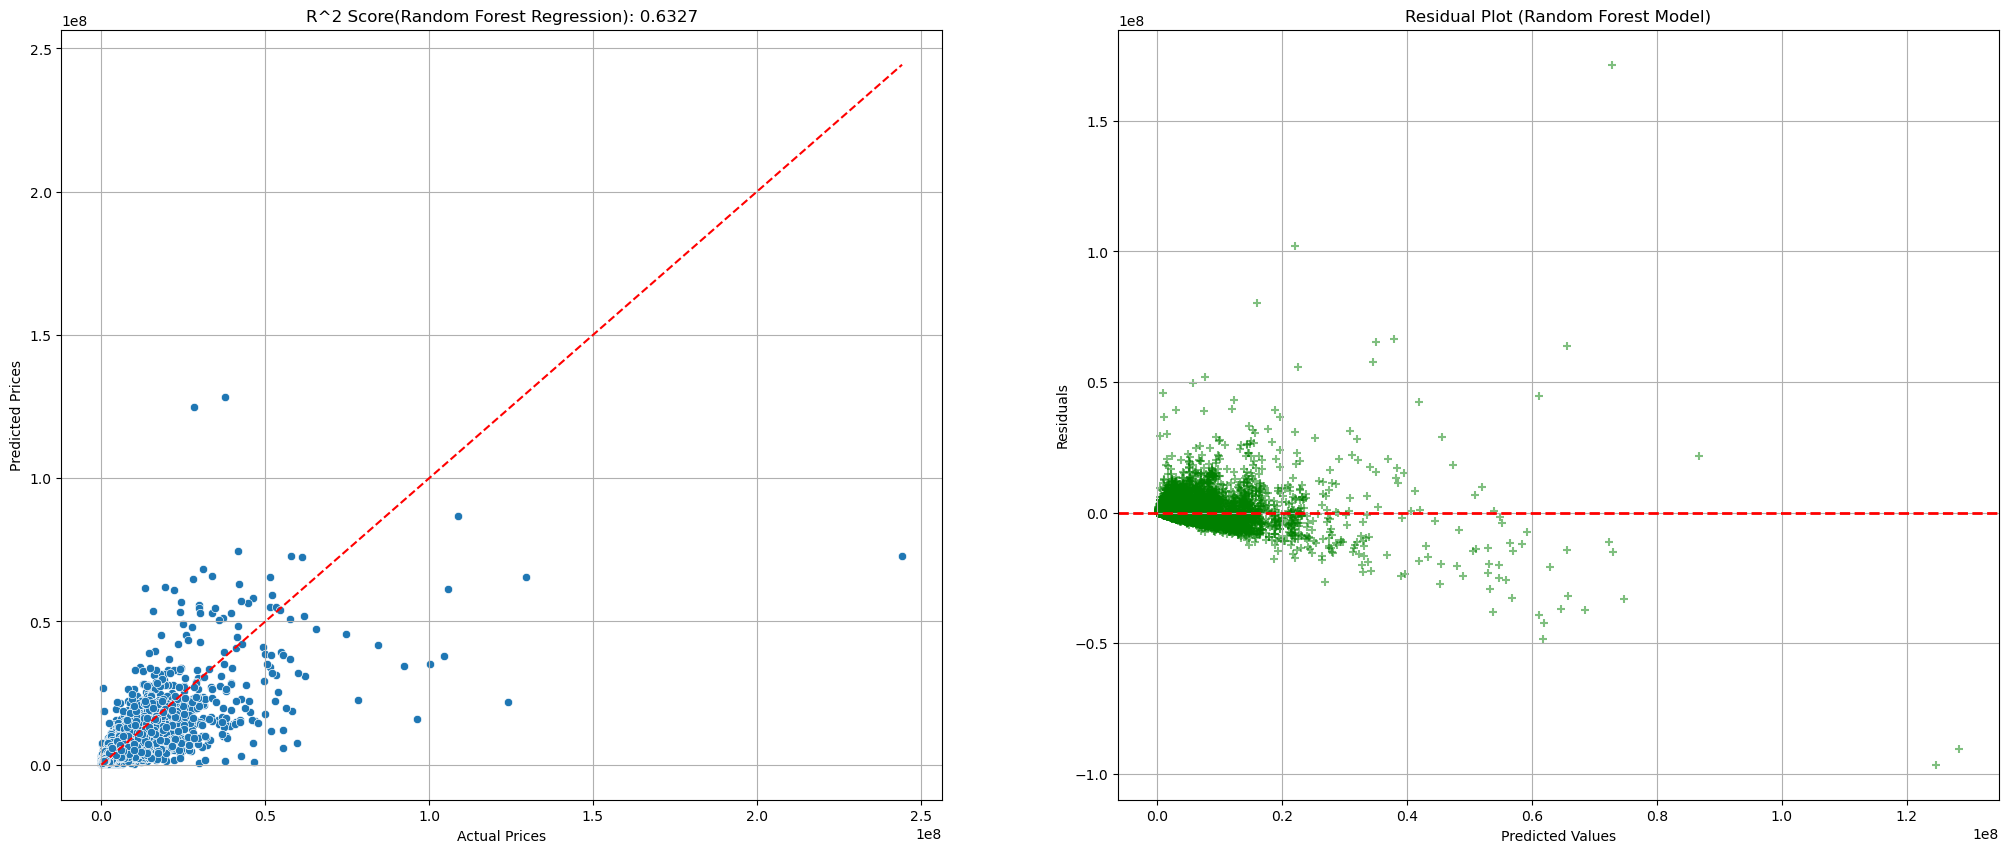

In [82]:
plt.figure(figsize=(25,10))
# Scatter plot for R^2 Score
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test.values.reshape(len(y_test)), y=y_pred_rf)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], '--', color='red')
plt.title(f'R^2 Score(Random Forest Regression): {r2_score(y_test, y_pred_rf):.4f}')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)

# Residual Plot
plt.subplot(1, 2, 2)
# Assuming y_test contains the true values and y_pred contains the predicted values
residuals = y_test.values.reshape(len(y_test)) - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.5,color="green",marker='+')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Model)')
plt.grid(True)
plt.show()
#plt.subplots_adjust(wspace=0.2)

### ii. Decision Tree

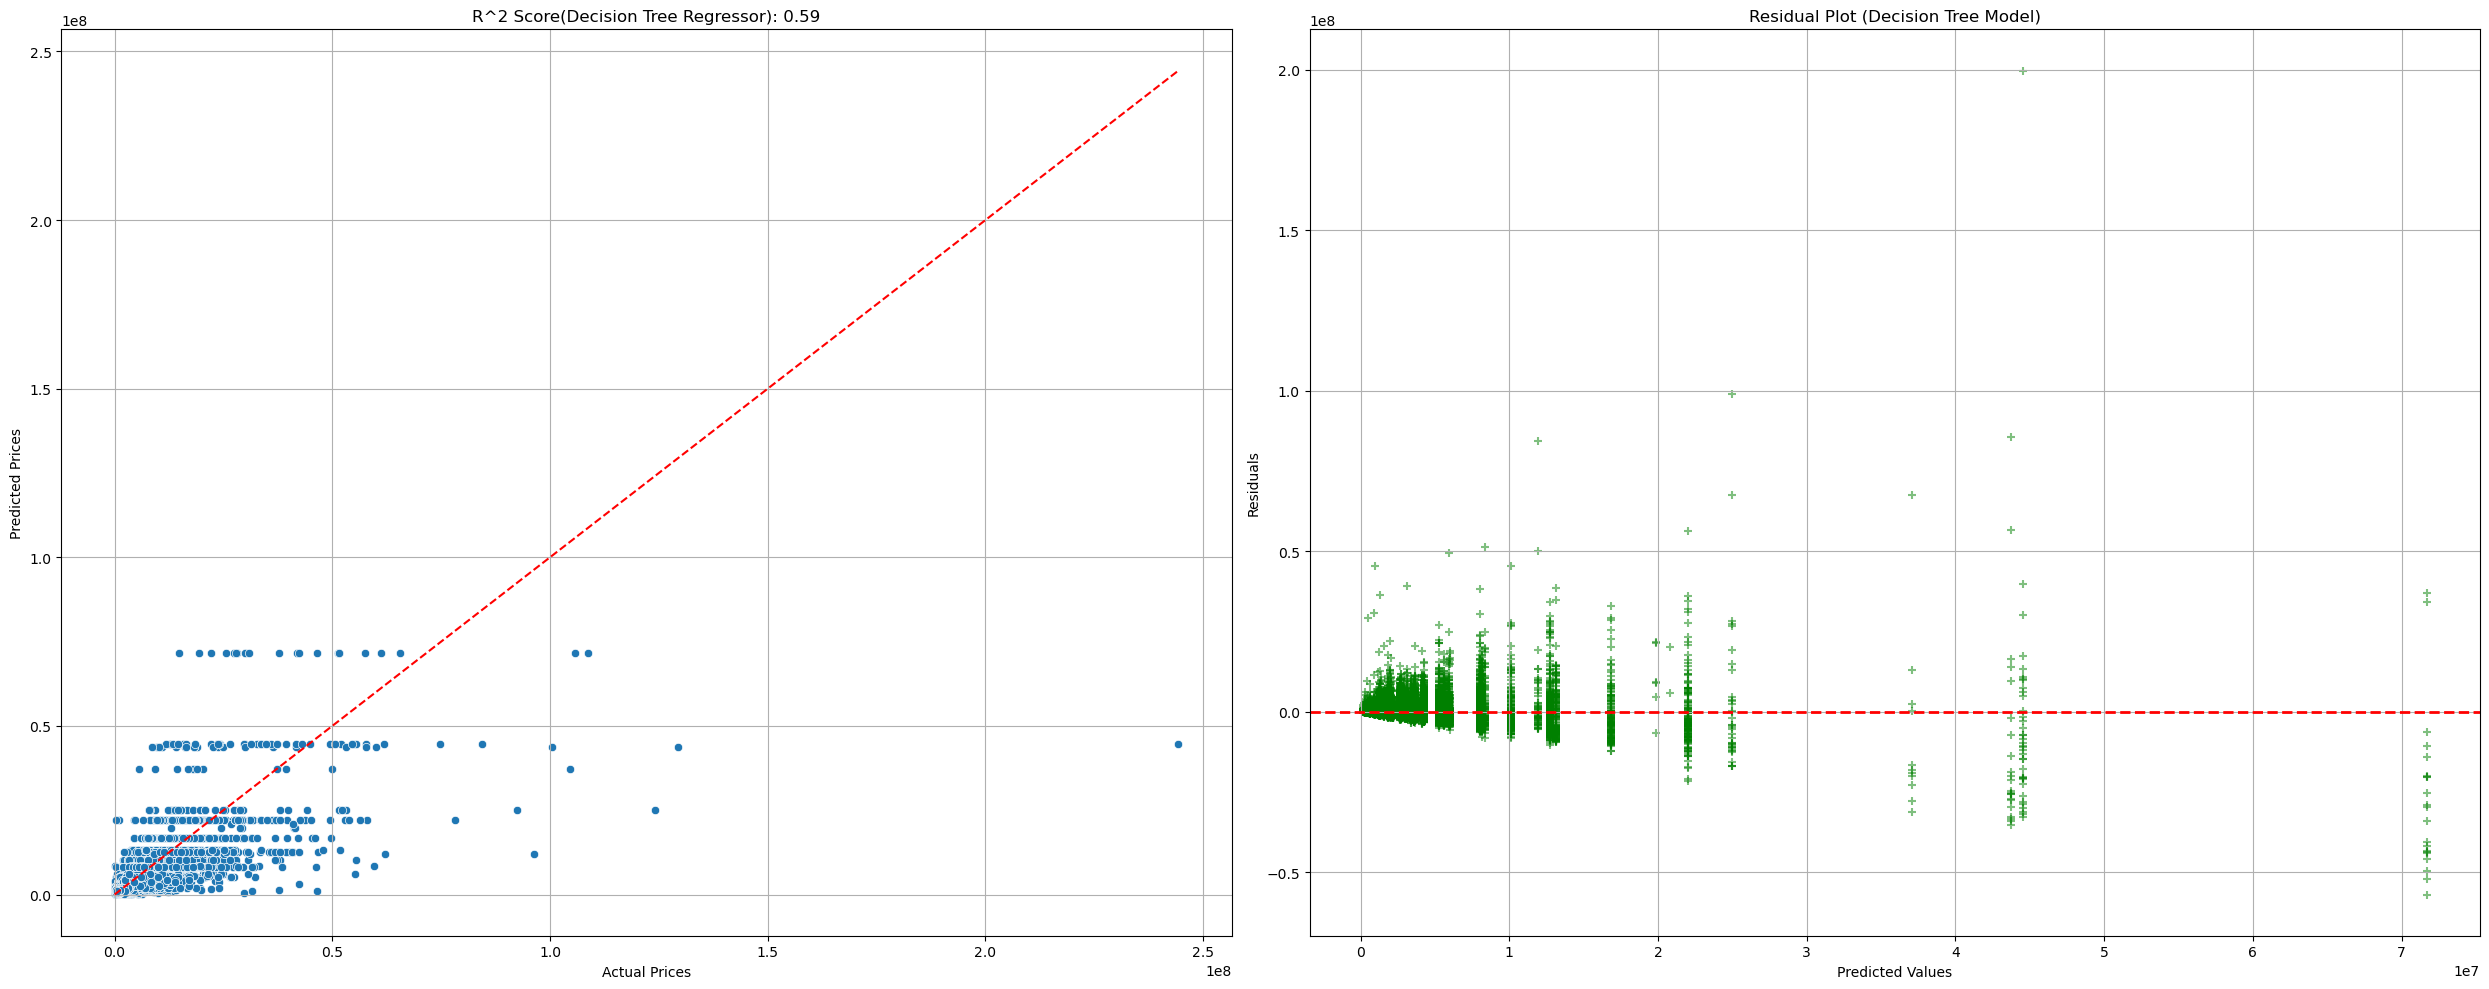

In [93]:
plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test.values.reshape(len(y_test)), y=y_pred_dt)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], '--', color='red')
plt.title(f'R^2 Score(Decision Tree Regressor): {r2_score(y_test, y_pred_dt):.2f}')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)

plt.subplot(1, 2, 2)
# Assuming y_test contains the true values and y_pred contains the predicted values
residuals = y_test.values.reshape(len(y_test)) - y_pred_dt
plt.scatter(y_pred_dt, residuals, alpha=0.5,color="green",marker='+')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Decision Tree Model)')
plt.grid(True)

plt.tight_layout()
plt.show()

### iii. XGBoost 

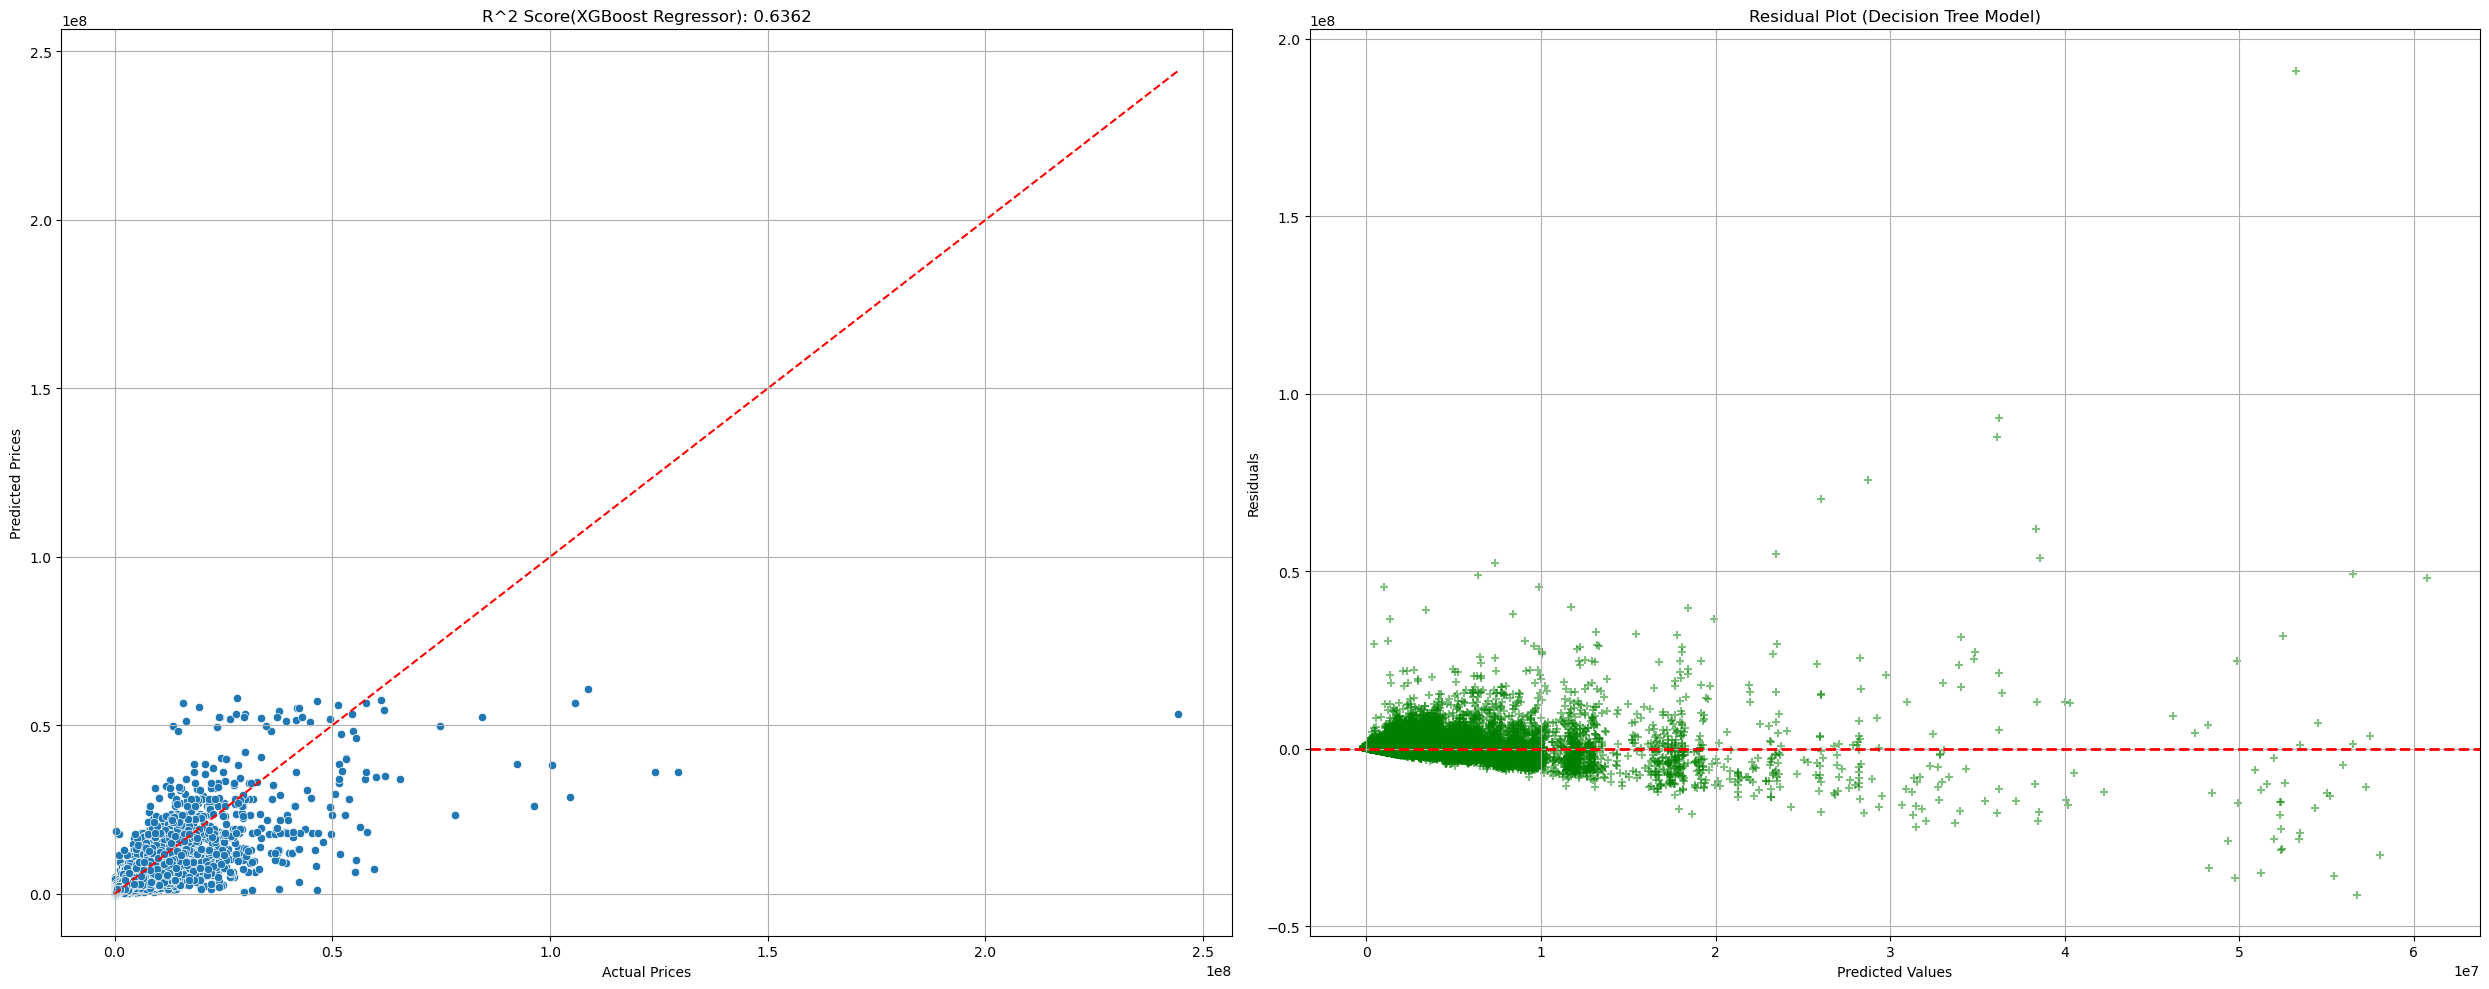

In [94]:
plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test.values.reshape(len(y_test)), y=y_pred_xgb)
plt.plot([y_test.values.min(), y_test.values.max()], [y_test.values.min(), y_test.values.max()], '--', color='red')
plt.title(f'R^2 Score(XGBoost Regressor): {r2_score(y_test, y_pred_xgb):.4f}')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)

plt.subplot(1, 2, 2)
residuals = y_test.values.reshape(len(y_test)) - y_pred_xgb
plt.scatter(y_pred_xgb, residuals, alpha=0.5,color="green",marker='+')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Decision Tree Model)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Score Comparison

In [106]:
r2_lm = r2_score(y_test, y_pred_lm)
r2_dt = r2_score(y_test, y_pred_dt)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_poly = poly_model.score(poly_features_test,y_test)
r2_rf = r2_score(y_test,y_pred_rf)

mae_lm = mean_absolute_error(y_test, y_pred_lm)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mae_poly = mean_absolute_error(y_test, poly_model.predict(poly_features_test))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

list_scores = [r2_lm,r2_dt,r2_xgb,r2_poly,r2_rf]
list_mae = [mae_lm,mae_dt,mae_xgb,mae_poly,mae_rf]
model_names = ['Linear_Regression','Decision_Tree','XGBoost','Polynomial_Regression','Random_Forest']

compare_scores_df = pd.DataFrame({"Model_Name":model_names, "R2_Scores":list_scores, "MAE":list_mae}).sort_values("R2_Scores", ascending=False)
compare_scores_df

,Model_Name,R2_Scores,MAE
2,XGBoost,0.636168,547923.454683
4,Random_Forest,0.632749,533893.552154
1,Decision_Tree,0.594627,542521.021128
3,Polynomial_Regression,0.555786,671011.320764
0,Linear_Regression,0.355839,860489.730888


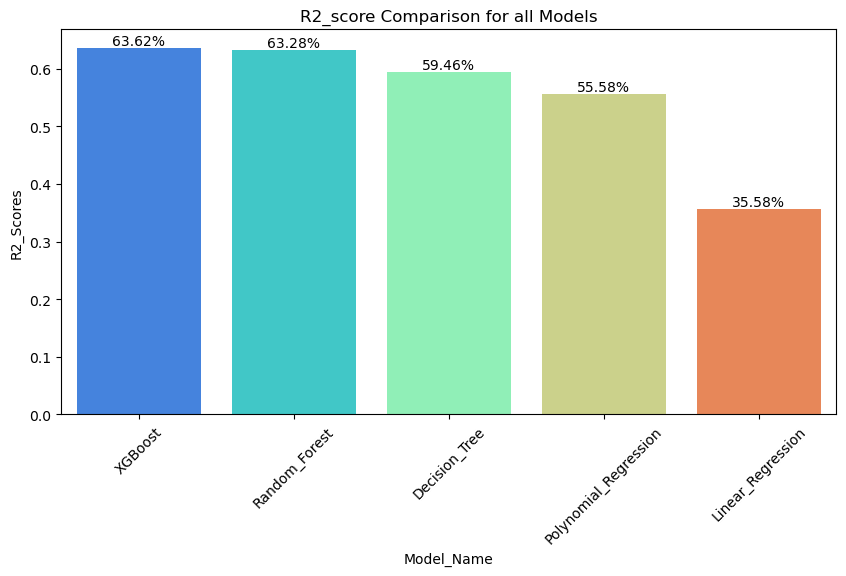

In [130]:
plt.figure(figsize=(10,5))
sns.barplot(data=compare_scores_df, x='Model_Name', y='R2_Scores', palette="rainbow")
plt.xticks(rotation=45)
plt.title("R2_score Comparison for all Models")
for i, value in enumerate(compare_scores_df['R2_Scores']):
    plt.text(i, value, f"{round(value,5)*100:.2f}%", ha='center', va='bottom')
plt.show()

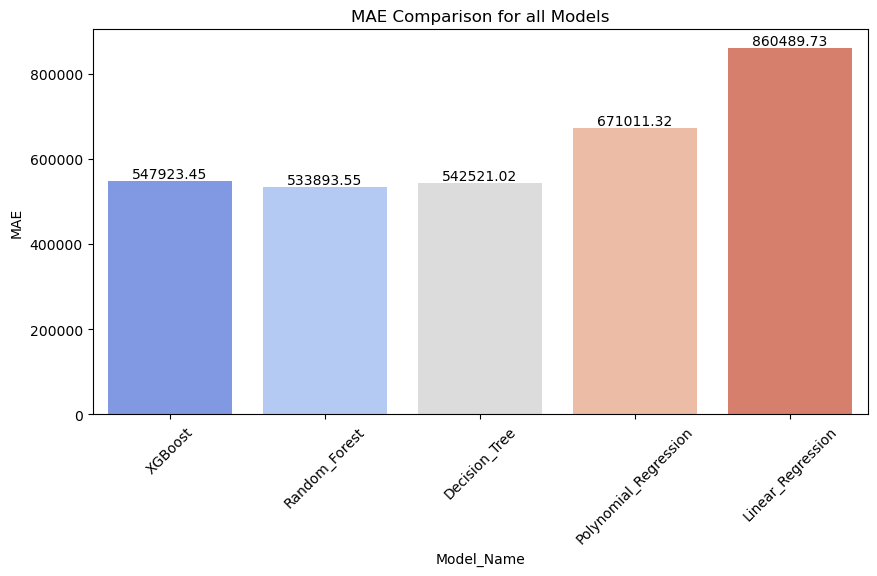

In [121]:
plt.figure(figsize=(10,5))
sns.barplot(data=compare_scores_df, x='Model_Name', y='MAE', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("MAE Comparison for all Models")
for i, value in enumerate(compare_scores_df['MAE']):
    plt.text(i, round(value,2), str(round(value,2)), ha='center', va='bottom')
plt.show()

* As is visible from the above visualizations, we have got XGBoost and Random Forest as the best performing models.
* But as it has been proven by checking for cross-validation scores, XGBoost seems to be overfitting slightly more than the Random Forest.
* Also, by comparing the Residue plots for different models, we can see Random Forest is the one whose Residues are less spread than the other models, which serves as another reason in favour of Random Forest.
* Furthermore, the MAE(Mean Absolute Error) comparison clearly puts RF over XGBoost.
* Hence, for the final prediction we will be using the Random Forest Model as of now.
* After going through multiple iterations of Hyper-parameter tuning we have reached to this accuracy score for Random Forest Regressor (around 63%).